In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# POS Proportion

In [26]:
pos = {'NN': 76,
'PREP': 59,
'VB': 40,
'REL': 31,
'ADV': 29,
'DET': 20,
'ART': 18,
'NM': 7,
'QT': 1,
'etc': 6}

pos_ = dict(sorted(pos.items(), key=lambda x: x[1], reverse=True))
pos_

{'NN': 76,
 'PREP': 59,
 'VB': 40,
 'REL': 31,
 'ADV': 29,
 'DET': 20,
 'ART': 18,
 'NM': 7,
 'etc': 6,
 'QT': 1}

In [27]:
labels = pos_.keys()
sizes = pos_.values()

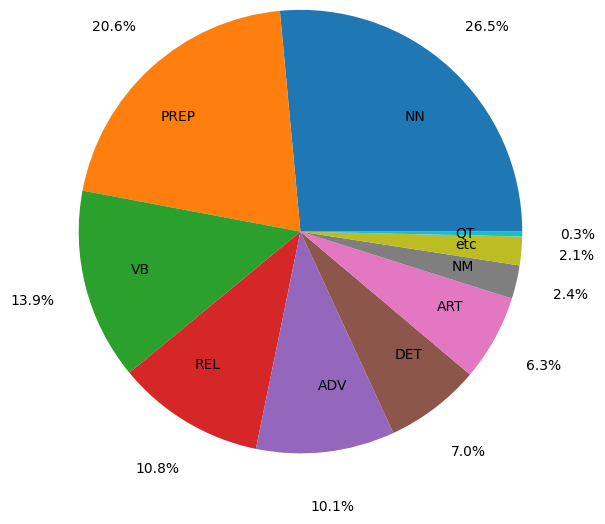

In [34]:
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%',
       pctdistance=1.25, labeldistance=.7,
      radius=1.5)
plt.savefig(fname='fig7.png', dpi=300, format='png')
plt.show()

# PE - Sent Length

In [27]:
import os
data = [f for f in os.listdir('.') if len(f) == 5]
data

['q.csv', 'p.csv', 'r.csv', 'x.csv', 'y.csv', 'z.csv']

In [32]:
df = pd.read_csv(data[0])
for col in df.columns:
    df[col] = df[col].astype(float)

In [35]:
df = df.fillna(0)

In [38]:
df.corr()['Segment Length']

Segment Length        1.000000
Post-edit Time(ms)    0.704417
Edit Effort           0.348892
Name: Segment Length, dtype: float64

In [40]:
def clean_data(file):
    df = pd.read_csv(file)
    for col in df.columns:
        df[col] = df[col].astype(float)
    df = df.fillna(0)
    return df

In [50]:
result = pd.DataFrame()
for file in data:
    name = file[0].upper()
    df = clean_data(file)
    cor = df.corr()['Segment Length']
    cor = cor.drop(index='Segment Length')
    result[name] = cor
    
result

,Q,P,R,X,Y,Z
Post-edit Time(ms),0.704417,0.742296,0.599446,0.547032,0.734816,0.067771
Edit Effort,0.348892,0.348075,0.297453,0.287209,0.260017,0.209292


In [54]:
import seaborn as sns

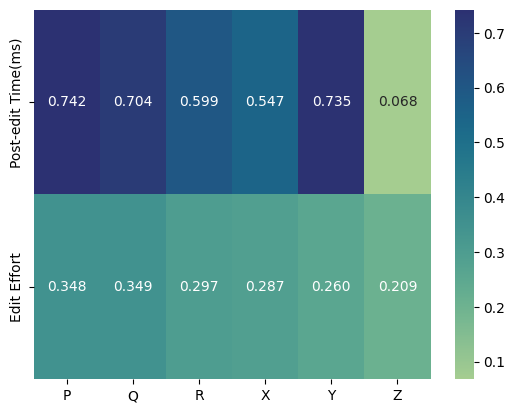

In [61]:
sns.heatmap(result['P Q R X Y Z'.split()], annot=True, fmt='.3f', cmap="crest")
plt.savefig(dpi=300, fname='pe_corr.png', format='png')

In [65]:
import numpy as np
np.mean(result.iloc[1])

0.291822841098853

# Edit Distance

In [70]:
distance = list(range(11))
d = [0.25853,	0.17585,	0.15879,	0.14304,	0.09318,	0.06824,	0.05249,	0.03543,	0.01444, 0, 0]
df2 = pd.DataFrame(data=d, index=distance, columns=['distance'])
df2

,distance
0,0.25853
1,0.17585
2,0.15879
3,0.14304
4,0.09318
5,0.06824
6,0.05249
7,0.03543
8,0.01444
9,0.00000


In [83]:
#df2.to_csv('edit_dist.csv')

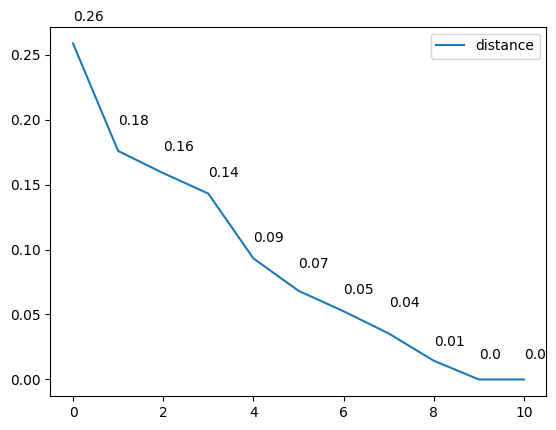

In [82]:
ax = df2.plot() 
for idx, label in enumerate(list(df2.index)): 
    for acc in df2.columns:
        value = np.round(df2.iloc[idx][acc],decimals=2)
        ax.annotate(value,
                    (idx, value),
                     xytext=(0, 15), 
                     textcoords='offset points')
plt.savefig(dpi=300, format='png', fname='distance.png')
plt.show()

# Correlation

In [84]:
df3 = pd.read_csv('pe_data.csv', index_col=0)
df3

,3,4,5,6,7,8,9,10,11,12,...,54,55,56,58,59,60,70,72,75,82
PE,131.41,231.11,383.94,166.33,254.49,325.78,257.69,288.22,611.88,315.84,...,NaN,NaN,NaN,NaN,2334.06,NaN,NaN,NaN,NaN,NaN
T,114.96,NaN,387.45,152.88,420.33,387.82,242.97,520.12,301.46,443.20,...,2826.11,2691.73,2408.25,2348.68,4141.40,3912.25,3737.0,3174.38,5705.06,8737.93


In [86]:
df3 = df3.fillna(0)
df3

,3,4,5,6,7,8,9,10,11,12,...,54,55,56,58,59,60,70,72,75,82
PE,131.41,231.11,383.94,166.33,254.49,325.78,257.69,288.22,611.88,315.84,...,0.00,0.00,0.00,0.00,2334.06,0.00,0.0,0.00,0.00,0.00
T,114.96,0.00,387.45,152.88,420.33,387.82,242.97,520.12,301.46,443.20,...,2826.11,2691.73,2408.25,2348.68,4141.40,3912.25,3737.0,3174.38,5705.06,8737.93


In [100]:
df3.loc['len'] = [int(v) for v in df3.columns.tolist()]

In [121]:
sent_len = [	3,	4,	5,	6,	7,	8,	9,	10,	11,	12,	13,	14,	15,	16,	17,	18,	19,	20,	21,	22,	23,	24,	25,	26,	27,	28	,29,	30,	31,	32,	33,	34,	35,	36,	37,	39,	40,	41,	42,	44,	47,	48,	53,	54,	59]

In [105]:
df3 = df3.drop(index=(-1))

In [119]:
wph = [821,	623,	468,	
 1298,	990,	884,
 1257,	1249,	647,
 1367,	1392,	603,
 501,	994,	656,
 2029,	854,	721,
 1003,	1079,	1035,
 1334,	1109,	821,
 1060,	818,	962,
 1368,	716,	380,
 413,	413,	388,
 744,	516,	829,
 1289,	1023,	870,
 908,	891,	1489,
 1500,	961,	909]

In [111]:
df3.T.to_csv('pe_corr.csv')

In [112]:
df3.T.corr()

,PE,T,len
PE,1.000000,0.12229,-0.024402
T,0.122290,1.00000,0.703110
len,-0.024402,0.70311,1.000000


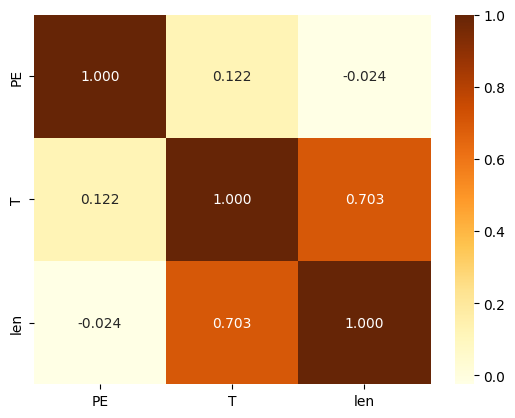

In [115]:
sns.heatmap(df3.T.corr(), annot=True, fmt='.3f', cmap="YlOrBr")
plt.savefig(dpi=300, fname='pe_t_corr.png', format='png')

In [123]:
df4 = pd.DataFrame(data=sent_len, columns=['len'])
df4

,len
0,3
1,4
2,5
3,6
4,7
5,8
6,9
7,10
8,11
9,12


In [124]:
df4['WPH'] = wph

In [125]:
df4.corr()

,len,WPH
len,1.000000,0.013658
WPH,0.013658,1.000000


In [126]:
pearsonr(sent_len, wph)

PearsonRResult(statistic=0.013658489825198447, pvalue=0.9290424110697563)

In [127]:
# pilot edit distance

In [128]:
ed = [0.34000,	0.10000	,0.15000,	0.10000,	0.06000,	0.05000,	0.07000,	0.01000,	0.07000,	0.01,	0.04]
distance

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [130]:
df5 = pd.DataFrame(data=ed, index=distance, columns=['distance'])
df5

,distance
0,0.34
1,0.10
2,0.15
3,0.10
4,0.06
5,0.05
6,0.07
7,0.01
8,0.07
9,0.01


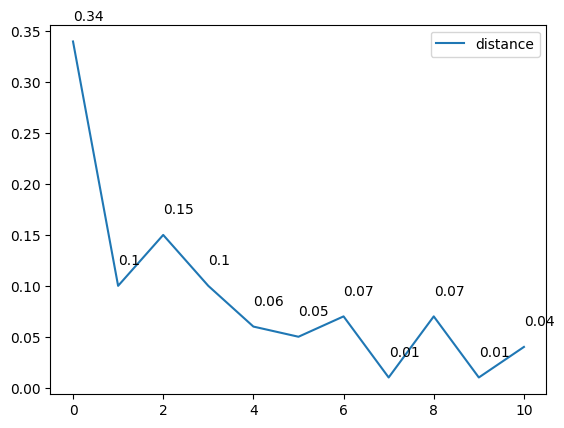

In [132]:
ax = df5.plot() 
for idx, label in enumerate(list(df5.index)): 
    for acc in df5.columns:
        value = np.round(df5.iloc[idx][acc],decimals=2)
        ax.annotate(value,
                    (idx, value),
                     xytext=(0, 15), 
                     textcoords='offset points')
plt.savefig(dpi=300, format='png', fname='distance_pilot.png')
plt.show()